In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TUXML_CSV_FILENAME="./config_bdd.csv"

# sanity check CSV
with open(TUXML_CSV_FILENAME, "r") as file:
    k = file.readline()
    t = k.split(",")
    s = set(t)
    assert(len(t) == len(s)) # unique number of options/features/column names

# parsing for real with pandas 
rawtuxdata = pd.read_csv(open(TUXML_CSV_FILENAME, "r"))

basic_head = ["cid", "time"] # "compile"
size_methods = ["vmlinux", "GZIP-bzImage", "GZIP-vmlinux", "GZIP", "BZIP2-bzImage", 
              "BZIP2-vmlinux", "BZIP2", "LZMA-bzImage", "LZMA-vmlinux", "LZMA", "XZ-bzImage", "XZ-vmlinux", "XZ", 
              "LZO-bzImage", "LZO-vmlinux", "LZO", "LZ4-bzImage", "LZ4-vmlinux", "LZ4"]

tri_state_values = ['y', 'n', 'm']

ftuniques = []
freq_ymn_features = []
non_tristate_options = []

for col in rawtuxdata:
    ft = rawtuxdata[col]    
    # eg always "y"
    if len(ft.unique()) == 1:
        ftuniques.append(col)
    # only tri-state values (y, n, m) (possible TODO: handle numerical/string options)    
    elif all(x in tri_state_values for x in ft.unique()):     #len(ft.unique()) == 3: 
        freq = ft.value_counts(normalize=True)
        freqy = 0
        freqn = 0
        freqm = 0
        if ('y' in freq.index):
            freqy = freq['y']
        if ('n' in freq.index):
            freqn = freq['n']
        if ('m' in freq.index):
            freqm = freq['m']
        freq_ymn_features.append((col, freqy, freqm, freqn))
        # categorical variable
        #if tuxdata[col].dtype == 'object':
        #    try:
        #        tuxdata[col] = tuxdata[col].astype('category')
        #    except:
        #        print('Column', ' ', col, ' cannot be converted to category.')
    else:
        if not (col in size_methods): 
            non_tristate_options.append(col)
        

### TODO: we want to keep all quantitative values!
# non_tristate_options.remove('LZO') # ('vmlinux')

# we want to keep measurements (that are not tristate ;)) 
# non_tristate_options = list(set(non_tristate_options) - set(size_methods))

#### print options with unique values
# options with only one value eg always "y"
#i = 0
#for ft in ftuniques:
#    print(ft + " (" + str(i) + ")")
#    i = i + 1

print("Original size (#configs/#options) of the dataset " + str(rawtuxdata.shape))
print ("Number of options with only one value (eg always y): " + str(pd.DataFrame(ftuniques).shape))

# maybe we can drop options with only one unique value (no interest for machine learning)
rawtuxdata.drop(columns=ftuniques,inplace=True)

print ("Non tri-state value options (eg string or integer or hybrid values): " 
       + str(pd.DataFrame(non_tristate_options).shape) + " ") 
#      + str(pd.DataFrame(non_tristate_options)))

print ("Predictor variables: " + str(rawtuxdata.drop(columns=non_tristate_options).columns.size))
# frequency of y, m, and n values 
#plt.figure()
#pd.DataFrame(freq_ymn_features, columns=["feature", "freqy", "freqm", "freqn"]).plot(kind='hist', alpha=0.8) #plot()
#plt.show()


    



/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1150,6015,6026,6717,7350,7676,7726,9949,10442) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Original size (#configs/#options) of the dataset (11538, 12798)
Number of options with only one value (eg always y): (3134, 1)
Non tri-state value options (eg string or integer or hybrid values): (173, 1) 
Predictor variables: 9491


In [2]:
rawtuxdata[rawtuxdata['vmlinux'] == 1168072][['cid', 'CC_OPTIMIZE_FOR_SIZE']]

,cid,CC_OPTIMIZE_FOR_SIZE
6094,70713,y
6098,70717,y
6107,70730,y
6108,70731,y


In [3]:
rawtuxdata[rawtuxdata['vmlinux'] == -1]

,cid,date,time,vmlinux,GZIP-bzImage,GZIP-vmlinux,GZIP,BZIP2-bzImage,BZIP2-vmlinux,BZIP2,...,SND_SOC_INTEL_SKL_NAU88L25_SSM4567_MACH,APDS9960,ARCH_SUPPORTS_INT128,SLABINFO,MICROCODE_AMD,ISDN_DRV_HISAX,CHARGER_BQ24190,SND_SOC_NAU8825,BH1750,NETWORK_FILESYSTEMS
9,64519,2018-06-27 20:44:05,480.489,-1,-1,-1,-1,-1,-1,-1,...,n,n,y,y,y,n,y,n,n,y
17,64527,2018-06-27 20:45:35,619.328,-1,-1,-1,-1,-1,-1,-1,...,n,y,y,y,y,n,n,n,y,y
38,64548,2018-06-27 20:48:15,495.525,-1,-1,-1,-1,-1,-1,-1,...,n,m,y,y,n,n,m,n,m,y
54,64564,2018-06-27 20:50:45,246.208,-1,-1,-1,-1,-1,-1,-1,...,n,y,y,y,y,n,n,n,y,n
67,64577,2018-06-27 20:52:27,377.385,-1,-1,-1,-1,-1,-1,-1,...,n,n,y,y,n,n,y,n,m,n
68,64578,2018-06-27 20:52:32,255.326,-1,-1,-1,-1,-1,-1,-1,...,n,n,y,n,y,n,n,n,n,n
84,64594,2018-06-27 20:54:01,396.363,-1,-1,-1,-1,-1,-1,-1,...,n,y,y,y,y,n,y,n,n,n
85,64595,2018-06-27 20:54:01,257.207,-1,-1,-1,-1,-1,-1,-1,...,n,n,y,y,n,n,n,y,y,y
99,64609,2018-06-27 20:57:15,296.149,-1,-1,-1,-1,-1,-1,-1,...,n,n,y,n,y,n,y,n,n,n
145,64655,2018-06-27 21:03:46,192.264,-1,-1,-1,-1,-1,-1,-1,...,n,n,y,n,n,n,n,n,n,n


In [4]:
# playing a bit with the data 
rawtuxdata.dtypes
# 'DEBUG_INFOO' in list(pd.DataFrame(non_tristate_options)[0]) # 
# tuxdata['DEBUG_INFO'].unique()
#tuxdata['OUTPUT_FORMAT'].dtypes
#tuxdata['DEFAULT_HOSTNAME'].unique()

#rawtuxdata[:5]
rawtuxdata[:20]['vmlinux']
#tuxdata[:5]['CONFIG_DEBUG_INFO']
#tuxdata['ARCH_HAS_SG_CHAIN'].unique()
#tuxdata['ARCH_HAS_SG_CHAIN'].astype('category')

0      30880200
1      53875520
2      18772696
3      24147496
4     230285584
5      69676088
6      35061024
7      89176752
8      32526392
9            -1
10     39675592
11     66906576
12     27363432
13     53800928
14     47768152
15     89392680
16     45488728
17           -1
18     20366504
19     13354128
Name: vmlinux, dtype: int64

In [5]:
rawtuxdata.shape, rawtuxdata[rawtuxdata['vmlinux'] != -1].shape, 

((11538, 9664), (10832, 9664))

In [6]:
from sklearn.preprocessing import *
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


LEARN_COMPILATION_SUCCESS = False # costly in time and space 
compilation_status_column_name = 'compile_success'

def encode_data_compilation(rawtuxdata):
    lae = LabelEncoder()
    # we save quantitative values we want (here vmlinux, TODO: generalize)
    # the key idea is that the labelling encoder should not be applied to this kind of values (only to predictor variables!)
    # vml = rawtuxdata['LZO'] # rawtuxdata['vmlinux'] 
    o_sizes = rawtuxdata[size_methods]

    # we remove non tri state options, but TODO there are perhaps some interesting options (numerical or string) here
    #tuxdata = rawtuxdata.drop(columns=non_tristate_options).drop(columns=['vmlinux']).apply(le.fit_transform)
    tuxdata_for_compilation = rawtuxdata.drop(columns=non_tristate_options).drop(columns=size_methods).apply(lae.fit_transform)

    #tuxdata['vmlinux'] = vml 
    tuxdata_for_compilation[size_methods] = o_sizes
    tuxdata_for_compilation[compilation_status_column_name] = rawtuxdata['vmlinux'] != -1
    return tuxdata_for_compilation

def learn_compilation_success(tuxdata_for_compilation):
    TESTING_SIZE=0.9 
    X_train, X_test, y_train, y_test = train_test_split(tuxdata_for_compilation.drop(columns=size_methods).drop(columns=compilation_status_column_name), tuxdata_for_compilation[compilation_status_column_name], test_size=TESTING_SIZE, random_state=0)  
    clf = GradientBoostingClassifier(n_estimators=100) #RandomForestRegressor(n_estimators=100) #   #GradientBoostingRegressor(n_estimators=100)  
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]    

    TOP_FT_IMPORTANCE=20
    print("Feature ranking: " + "top (" + str(TOP_FT_IMPORTANCE) + ")")
    for f in range(TOP_FT_IMPORTANCE): # len(indices)
        print("%d. feature %s %d (%f)" % (f + 1, tuxdata_for_compilation.columns[indices[f]], indices[f], importances[indices[f]]))

    acc = accuracy_score (y_test, y_pred)
    prec = precision_score (y_test, y_pred)
    reca = recall_score (y_test, y_pred)
    f1 = f1_score (y_test, y_pred)
    print("Accuracy score: %.2f" % (acc))
    print("Precision score: %.2f" % (prec))
    print("Recall score: %.2f" % (reca))
    print("F1 score: %.2f" % (f1))

if (LEARN_COMPILATION_SUCCESS):
    tuxdata_for_compilation = encode_data_compilation(rawtuxdata)
    tuxdata_for_compilation [compilation_status_column_name].describe()
    learn_compilation_success(tuxdata_for_compilation)

In [7]:
# remove entries with same configurations
print(str(len(rawtuxdata)) + " before the removal of some entries (those with same configurations)")
# tuxdata.drop_duplicates(subset=tuxdata.columns.difference(['vmlinux']), inplace=True)
#TODO: seems not working 
rawtuxdata.drop_duplicates(subset=rawtuxdata.columns.difference(size_methods), inplace=True)
print(str(len(rawtuxdata)) + " after the removal of some entries (those with same configurations)")

#n_failures = len(tuxdata[~np.isnan(tuxdata['vmlinux'])])
n_failures = len(rawtuxdata[rawtuxdata['vmlinux'] == -1]) #len(tuxdata[np.isnan(tuxdata['vmlinux'])])
print(str(n_failures) + " failures out of " + str(len(rawtuxdata)))

#tuxdata = tuxdata[~np.isnan(tuxdata['vmlinux'])]
rawtuxdata = rawtuxdata[rawtuxdata['vmlinux'] != -1] #tuxdata[~np.isnan(tuxdata['vmlinux'])]
print(str(len(rawtuxdata)) + " after the removal of configurations that do NOT compile")



#tuxdata["vmlinux"]
#tuxdata.where(tuxdata["vmlinux"] == np.NaN)

#tuxdata[tuxdata["vmlinux"] != -1]
#tuxdata
#tuxdata[tuxdata['vmlinux'] != -1].shape

11538 before the removal of some entries (those with same configurations)
11538 after the removal of some entries (those with same configurations)
706 failures out of 11538
10832 after the removal of configurations that do NOT compile


In [8]:
print("some configurations have X86_32 (coz we have tested/tried some options and there are in the database)", rawtuxdata['X86_64'].describe())
# we only keep X86_64 configurations
rawtuxdata = rawtuxdata[rawtuxdata['X86_64'] == 'y']

some configurations have X86_32 (coz we have tested/tried some options and there are in the database) count     10832
unique        2
top           y
freq      10828
Name: X86_64, dtype: object


<Figure size 432x288 with 0 Axes>

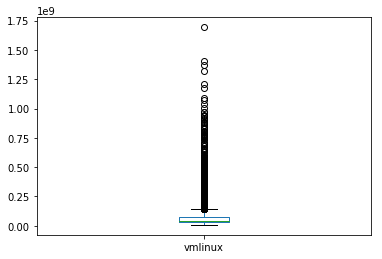

<Figure size 432x288 with 0 Axes>

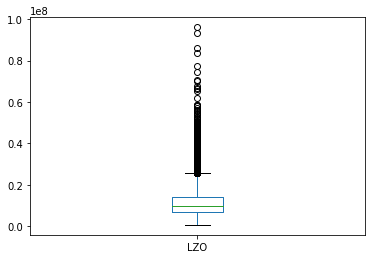

<Figure size 432x288 with 0 Axes>

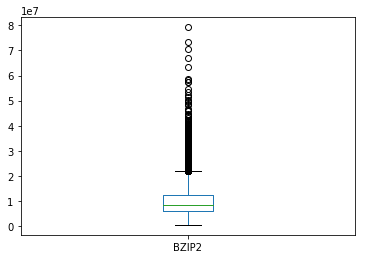

count    1.082800e+04
mean     7.139951e+07
std      9.230716e+07
min      7.317008e+06
25%      2.923826e+07
50%      4.389003e+07
75%      7.448915e+07
max      1.693674e+09
Name: vmlinux, dtype: float64

In [9]:
plt.figure()
pd.DataFrame(rawtuxdata['vmlinux']).plot.box()
plt.show(block=False)

plt.figure()
pd.DataFrame(rawtuxdata['LZO']).plot.box()
plt.show(block=False)

plt.figure()
pd.DataFrame(rawtuxdata['BZIP2']).plot.box()
plt.show(block=False)


rawtuxdata['vmlinux'].describe()


In [10]:
import scipy.stats
import seaborn as sns



def color_negative_positive(val, pcolor="green", ncolor="red"):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = pcolor if val > 0 else ncolor 
    if val == 0:
        color = 'black' 
    return 'color: %s' % color

compress_methods = ["GZIP", "BZIP2", "LZMA", "XZ", "LZO", "LZ4"]
def compareCompress(size_measure_of_interest): #"" # "-vmlinux" #"-bzImage" # prefix
    rCompressDiff = pd.DataFrame(index=list(map(lambda c: c + "o", compress_methods)) , columns=compress_methods) 
    for compress_method in compress_methods:
        for compress_method2 in compress_methods:
            rCompressDiff.loc[compress_method + "o"][compress_method2] = (np.mean(rawtuxdata[compress_method + size_measure_of_interest] / rawtuxdata[compress_method2 + size_measure_of_interest]) * 100) - 100
    return rCompressDiff

#cmy = sns.light_palette("red", as_cmap=True)
compareCompress("").style.set_caption('Difference (average in percentage) per compression methods').applymap(color_negative_positive)

#(rawtuxdata["XZ-vmlinux"] - rawtuxdata["BZIP2-vmlinux"]).plot.box()
# n_size_methods = len(size_methods)
#corr_sizes = [[0 for x in range(n_size_methods)] for y in range(n_size_methods)]
#i = 0
#j = 0
#for size_method in size_methods:
#    csize = rawtuxdata[size_method]   
#    for osize_method in size_methods:
#        if size_method != osize_method:
#            osize = rawtuxdata[osize_method]           
#            pcorr = scipy.stats.pearsonr(csize, osize)[0]
#            corr_sizes[i][j] = pcorr
#        j = j + 1
#    i = i + 1

,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,2.90954,25.234,39.4671,-10.3629,-16.523
BZIP2o,-2.7387,0,21.8076,35.6067,-12.8644,-18.8739
LZMAo,-20.074,-17.749,0,11.3779,-28.3193,-33.2281
XZo,-27.9684,-25.8968,-9.86999,0,-35.4086,-39.8328
LZOo,11.6453,14.8312,39.9012,55.7746,0,-6.90324
LZ4o,19.9901,23.3789,50.4059,67.4656,7.43531,0


In [11]:
compareCompress("-bzImage").style.set_caption('Difference (average in percentage) per compression methods, bzImage').applymap(color_negative_positive)


,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,-30.6754,24.8181,38.4272,-10.0448,-16.2392
BZIP2o,48.6661,0,84.9377,104.733,33.8417,24.6808
LZMAo,-19.8061,-44.5855,0,10.9109,-27.8233,-32.7767
XZo,-27.4323,-49.9256,-9.50638,0,-34.6948,-39.1775
LZOo,11.2492,-22.8148,38.9431,54.0694,0,-6.91613
LZ4o,19.5786,-16.9961,49.3919,65.6506,7.44922,0


In [12]:
compareCompress("-vmlinux").style.set_caption('Difference (average in percentage) per compression methods, vmlinux').applymap(color_negative_positive)


,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,-25.8791,19.2494,29.025,-8.25739,-13.5063
BZIP2o,36.8228,0,62.5176,75.5527,25.6941,18.602
LZMAo,-16.0115,-37.9889,0,8.16807,-22.8888,-27.2709
XZo,-22.1589,-42.6173,-7.34707,0,-28.5282,-32.5846
LZOo,9.07978,-19.0403,30.1863,40.8643,0,-5.75401
LZ4o,15.8068,-13.9741,38.2811,49.632,6.12685,0


In [13]:
cm = sns.light_palette("green", as_cmap=True)
pd.DataFrame.corr(rawtuxdata[size_methods]).style.set_caption('Correlations between size measures').background_gradient(cmap=cm)


,vmlinux,GZIP-bzImage,GZIP-vmlinux,GZIP,BZIP2-bzImage,BZIP2-vmlinux,BZIP2,LZMA-bzImage,LZMA-vmlinux,LZMA,XZ-bzImage,XZ-vmlinux,XZ,LZO-bzImage,LZO-vmlinux,LZO,LZ4-bzImage,LZ4-vmlinux,LZ4
vmlinux,1,0.482816,0.482843,0.481942,0.498189,0.498114,0.497387,0.471408,0.471445,0.470197,0.475197,0.475237,0.473917,0.499375,0.499396,0.498699,0.505405,0.505423,0.50482
GZIP-bzImage,0.482816,1,1,0.99999,0.996829,0.996453,0.997014,0.997641,0.997643,0.997567,0.993868,0.993869,0.993801,0.996762,0.996758,0.996896,0.993345,0.99334,0.99352
GZIP-vmlinux,0.482843,1,1,0.99999,0.996834,0.996459,0.997019,0.99764,0.997642,0.997565,0.993867,0.993869,0.9938,0.996767,0.996763,0.996901,0.993352,0.993347,0.993527
GZIP,0.481942,0.99999,0.99999,1,0.996627,0.996252,0.996832,0.997672,0.997673,0.997624,0.993886,0.993887,0.993848,0.996586,0.996581,0.996737,0.993098,0.993093,0.993288
BZIP2-bzImage,0.498189,0.996829,0.996834,0.996627,1,0.999623,0.99999,0.993319,0.993328,0.992986,0.990869,0.990878,0.990526,0.998249,0.99825,0.99822,0.997078,0.997077,0.997106
BZIP2-vmlinux,0.498114,0.996453,0.996459,0.996252,0.999623,1,0.999613,0.992943,0.992952,0.99261,0.990455,0.990464,0.990113,0.997888,0.997888,0.997859,0.996721,0.99672,0.996749
BZIP2,0.497387,0.997014,0.997019,0.996832,0.99999,0.999613,1,0.993545,0.993553,0.993238,0.991082,0.99109,0.990768,0.998264,0.998264,0.998251,0.997021,0.997019,0.997064
LZMA-bzImage,0.471408,0.997641,0.99764,0.997672,0.993319,0.992943,0.993545,1,1,0.999982,0.99427,0.99427,0.994263,0.990383,0.990378,0.99055,0.985197,0.985191,0.985401
LZMA-vmlinux,0.471445,0.997643,0.997642,0.997673,0.993328,0.992952,0.993553,1,1,0.999981,0.994271,0.99427,0.994263,0.990392,0.990386,0.990558,0.985209,0.985202,0.985411
LZMA,0.470197,0.997567,0.997565,0.997624,0.992986,0.99261,0.993238,0.999982,0.999981,1,0.994236,0.994234,0.994266,0.990083,0.990077,0.990272,0.984801,0.984794,0.985025


In [14]:
#from category_encoders import *
from sklearn.preprocessing import *

#X = [['y', 1], ['n', 3], ['m', 2]]
#enc.fit(X)
#enc.transform(tuxdata)

#enc = OrdinalEncoder().fit(tuxdata[:10])

# transform the dataset
#enc.transform(tuxdata[:10])

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
#print(non_tristate_options)

# we save quantitative values we want (here vmlinux, TODO: generalize)
# the key idea is that the labelling encoder should not be applied to this kind of values (only to predictor variables!)
# vml = rawtuxdata['LZO'] # rawtuxdata['vmlinux'] 
vml = rawtuxdata[size_methods]

# we remove non tri state options, but TODO there are perhaps some interesting options (numerical or string) here
#tuxdata = rawtuxdata.drop(columns=non_tristate_options).drop(columns=['vmlinux']).apply(le.fit_transform)
tuxdata = rawtuxdata.drop(columns=non_tristate_options).drop(columns=size_methods).apply(le.fit_transform)

#tuxdata['vmlinux'] = vml 
tuxdata[size_methods] = vml
# tuxdata['vmlinux'].astype('int64')

# example: DEBUG_INFO is either y or n
tuxdata['DEBUG_INFO'].unique()

array([0, 1])

In [15]:
#print ("Warning, we only focus on configurations without DEBUG_INFO ")
#tuxdata = tuxdata[tuxdata['DEBUG_INFO'] == le.transform(['n'])[0]]

In [16]:
tuxdata.shape

(10828, 9491)

In [17]:
# tuxdata.where(not np.isnan(tuxdata["vmlinux"]))
#tuxdata["vmlinux"][16] == np.isnan
#vml == -1 
#tuxdata["vmlinux"] == -1
#tuxdata['vmlinux'].dtypes
#vml.dtypes
#tuxdata['vmlinux'].dtypes #.astype('int64')
#TODO: remove configurations like this 

In [18]:
# tuxdata.where(tuxdata["vmlinux"] != -1).sort_values(by='vmlinux')[:5] # & 
print(tuxdata['UBSAN_SANITIZE_ALL'].value_counts(), tuxdata['COMPILE_TEST'].value_counts(), tuxdata['NOHIGHMEM'].value_counts(), tuxdata['OPTIMIZE_INLINING'].value_counts(), tuxdata['SLOB'].value_counts(), tuxdata['CC_OPTIMIZE_FOR_SIZE'].value_counts(), sep='\n')


0    9514
1    1314
Name: UBSAN_SANITIZE_ALL, dtype: int64
1    5422
0    5406
Name: COMPILE_TEST, dtype: int64
0    10828
Name: NOHIGHMEM, dtype: int64
1    5598
0    5230
Name: OPTIMIZE_INLINING, dtype: int64
0    10525
1      303
Name: SLOB, dtype: int64
0    10422
1      406
Name: CC_OPTIMIZE_FOR_SIZE, dtype: int64


In [72]:
from sklearn.pipeline import Pipeline

# https://ramhiser.com/post/2018-03-25-feature-selection-with-scikit-learn-pipeline/
class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self

In [117]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn import svm
from sklearn.decomposition import PCA
from tpot import TPOTRegressor


TESTING_SIZE=0.9 

# drop(columns=["date", "time", "vmlinux", "cid"])
# tuxdata.drop(columns=non_tristate_options)

linearRegression=False
automl = True
size_of_interest = "vmlinux" # could be LZO, BZIP, etc. 

X_train, X_test, y_train, y_test = train_test_split(tuxdata.drop(columns=size_methods), tuxdata[size_of_interest], test_size=TESTING_SIZE, random_state=0)  
# multi output
#X_train, X_test, y_train, y_test = train_test_split(tuxdata.drop(columns=size_methods), tuxdata[size_methods], test_size=TESTING_SIZE, random_state=0)  

# train_test_split(tuxdata.drop(columns=['vmlinux']), tuxdata['vmlinux'], test_size=TESTING_SIZE, random_state=0)  

#clf = RandomForestRegressor(n_estimators=100) 

if linearRegression:
    regr =  linear_model.Lasso() # svm.SVC(kernel='linear') # linear_model.Ridge(alpha=.1) #  # linear_model.Lasso() # linear_model.SGDRegressor() #LinearRegression() # SGDRegressor or linear_model.Lasso()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    
elif automl:
    
    
    tpot_config = {

        'sklearn.linear_model.ElasticNetCV': {
            'l1_ratio': np.arange(0.0, 1.01, 0.05),
            'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
        },

        'sklearn.ensemble.ExtraTreesRegressor': {
            'n_estimators': [100],
            'max_features': np.arange(0.05, 1.01, 0.05),
            'min_samples_split': range(2, 21),
            'min_samples_leaf': range(1, 21),
            'bootstrap': [True, False]
        },

        'sklearn.ensemble.GradientBoostingRegressor': {
            'n_estimators': [100],
            'loss': ["ls", "lad", "huber", "quantile"],
            'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
            'max_depth': range(1, 11),
            'min_samples_split': range(2, 21),
            'min_samples_leaf': range(1, 21),
            'subsample': np.arange(0.05, 1.01, 0.05),
            'max_features': np.arange(0.05, 1.01, 0.05),
            'alpha': [0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
        },

        'sklearn.ensemble.AdaBoostRegressor': {
            'n_estimators': [100],
            'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
            'loss': ["linear", "square", "exponential"],
            'max_depth': range(1, 11)
        },

        'sklearn.tree.DecisionTreeRegressor': {
            'max_depth': range(1, 11),
            'min_samples_split': range(2, 21),
            'min_samples_leaf': range(1, 21)
        },

        'sklearn.neighbors.KNeighborsRegressor': {
            'n_neighbors': range(1, 101),
            'weights': ["uniform", "distance"],
            'p': [1, 2]
        },

        'sklearn.linear_model.LassoLarsCV': {
            'normalize': [True, False]
        },

        'sklearn.svm.LinearSVR': {
            'loss': ["epsilon_insensitive", "squared_epsilon_insensitive"],
            'dual': [True, False],
            'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
            'C': [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.],
            'epsilon': [1e-4, 1e-3, 1e-2, 1e-1, 1.]
        },

        'sklearn.ensemble.RandomForestRegressor': {
            'n_estimators': [100],
            'max_features': np.arange(0.05, 1.01, 0.05),
            'min_samples_split': range(2, 21),
            'min_samples_leaf': range(1, 21),
            'bootstrap': [True, False]
        },

        'sklearn.linear_model.RidgeCV': {
        },

        'xgboost.XGBRegressor': {
            'n_estimators': [100],
            'max_depth': range(1, 11),
            'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
            'subsample': np.arange(0.05, 1.01, 0.05),
            'min_child_weight': range(1, 21),
            'nthread': [1]
        }     
    }
    
    tpot = TPOTRegressor(generations=5, population_size=50, verbosity=3, config_dict=tpot_config, scoring='neg_mean_absolute_error')
    tpot.fit(X_train, y_train)
    y_pred = tpot.predict(X_test)
    print(tpot.score(X_test, y_test))
    tpot.export('tpot_boston_pipeline.py')
else:
    #clf = GradientBoostingRegressor(n_estimators=100) # RandomForestRegressor(n_estimators=100) #   
    # 
    estimator = RandomForestRegressor(n_estimators=100) # RidgeCV(alphas=[1000.0]) # LassoCV(tol = 0.001) #   #  # RandomForestRegressor(n_estimators=100) #LassoCV() #RidgeCV(alphas=[2000.0]) # LassoCV()
    #clf = PipelineRFE([ # Pipeline([
    #  ('feature_selection', SelectFromModel(estimator)), # tol = 0.001
    #  ('regression', GradientBoostingRegressor(n_estimators=100))
    #])
    clf = PipelineRFE([
      #('reduce_dim', PCA()),
      ('feature_selection', SelectFromModel(estimator)), # tol = 0.001
      ('regression', GradientBoostingRegressor(n_estimators=100))
    ])
    

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]    

    TOP_FT_IMPORTANCE=100
    print("Feature ranking: " + "top (" + str(TOP_FT_IMPORTANCE) + ")")
    for f in range(TOP_FT_IMPORTANCE): # len(indices)
        print("%d. feature %s %d (%f)" % (f + 1, tuxdata.columns[indices[f]], indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
#plt.figure()
#plt.title("Feature importances for size of vmlinux")
#plt.bar(range(tuxdata.shape[1]), importances[indices], color="r", align="center")
#plt.xticks(range(tuxdata.shape[1]), indices)
#plt.xlim([-1, tuxdata.shape[1]])
#plt.show()
mae = mean_absolute_error (y_test, y_pred)# , multioutput='raw_values')
mse = mean_squared_error (y_test, y_pred) #, multioutput='raw_values') 
r2 = r2_score (y_test, y_pred) #, multioutput='raw_values') 

ONE_MEGABYTE = 1048576

print("Prediction score (MAE): %.2f" % (mae / ONE_MEGABYTE))
print("Prediction score (MSE): %.2f" % (mse / ONE_MEGABYTE))
print("Prediction score (R2): %.2f" % (r2))


11 operators have been imported by TPOT.


Optimization Progress:   5%|▌         | 16/300 [19:05<11:33:05, 146.43s/pipeline]

Skipped pipeline #16 due to time out. Continuing to the next pipeline.


Optimization Progress:  17%|█▋        | 51/300 [1:03:45<5:58:51, 86.47s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False


Optimization Progress:  17%|█▋        | 51/300 [1:03:46<5:58:51, 86.47s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 __init__() got an unexpected keyword argument 'max_depth'


Optimization Progress:  23%|██▎       | 68/300 [1:25:42<9:46:07, 151.58s/pipeline]

Skipped pipeline #68 due to time out. Continuing to the next pipeline.


Optimization Progress:  30%|██▉       | 89/300 [1:59:38<8:14:16, 140.55s/pipeline] 

Skipped pipeline #89 due to time out. Continuing to the next pipeline.


Optimization Progress:  32%|███▏      | 96/300 [2:11:12<8:57:43, 158.16s/pipeline]

Skipped pipeline #96 due to time out. Continuing to the next pipeline.


Optimization Progress:  35%|███▍      | 104/300 [2:18:29<3:43:26, 68.40s/pipeline]

Generation 1 - Current Pareto front scores:
-1	-26334420.707204126	GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.8500000000000001, GradientBoostingRegressor__min_samples_leaf=12, GradientBoostingRegressor__min_samples_split=20, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6500000000000001)
-2	-23707124.629190497	RandomForestRegressor(LassoLarsCV(input_matrix, LassoLarsCV__normalize=True), RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=11, RandomForestRegressor__min_samples_split=14, RandomForestRegressor__n_estimators=100)

_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 84


Optimization Progress:  35%|███▍      | 104/300 [2:18:29<3:43:26, 68.40s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 61


Optimization Progress:  35%|███▍      | 104/300 [2:18:31<3:43:26, 68.40s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False


_pre_test decorator: _random_mutation_operator: num_test=0 __init__() got an unexpected keyword argument 'max_depth'


Optimization Progress:  36%|███▌      | 107/300 [2:18:32<2:34:57, 48.17s/pipeline]

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


Optimization Progress:  38%|███▊      | 113/300 [2:28:14<6:49:50, 131.50s/pipeline]

Skipped pipeline #113 due to time out. Continuing to the next pipeline.


Optimization Progress:  41%|████      | 122/300 [2:38:36<6:26:11, 130.18s/pipeline]

Skipped pipeline #122 due to time out. Continuing to the next pipeline.


Optimization Progress:  52%|█████▏    | 156/300 [3:48:58<4:37:07, 115.47s/pipeline]

Generation 2 - Current Pareto front scores:
-1	-26334420.707204126	GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.8500000000000001, GradientBoostingRegressor__min_samples_leaf=12, GradientBoostingRegressor__min_samples_split=20, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6500000000000001)
-2	-23094523.19486658	KNeighborsRegressor(ElasticNetCV(input_matrix, ElasticNetCV__l1_ratio=1.0, ElasticNetCV__tol=0.001), KNeighborsRegressor__n_neighbors=33, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=distance)



Optimization Progress:  52%|█████▏    | 156/300 [3:48:58<4:37:07, 115.47s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument.


Optimization Progress:  52%|█████▏    | 156/300 [3:48:58<4:37:07, 115.47s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 __init__() got an unexpected keyword argument 'max_depth'


Optimization Progress:  52%|█████▏    | 156/300 [3:48:59<4:37:07, 115.47s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 __init__() got an unexpected keyword argument 'max_depth'


Optimization Progress:  52%|█████▏    | 156/300 [3:49:00<4:37:07, 115.47s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 59


Optimization Progress:  52%|█████▏    | 156/300 [3:49:01<4:37:07, 115.47s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 __init__() got an unexpected keyword argument 'max_depth'


Optimization Progress:  52%|█████▏    | 156/300 [3:49:01<4:37:07, 115.47s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 62


Optimization Progress:  52%|█████▏    | 157/300 [3:49:03<3:16:12, 82.32s/pipeline] 

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


Optimization Progress:  53%|█████▎    | 159/300 [3:54:03<4:01:21, 102.70s/pipeline]

Skipped pipeline #159 due to time out. Continuing to the next pipeline.


Optimization Progress:  55%|█████▌    | 166/300 [4:05:35<5:48:59, 156.26s/pipeline]

Skipped pipeline #166 due to time out. Continuing to the next pipeline.


Optimization Progress:  58%|█████▊    | 174/300 [4:26:49<7:28:33, 213.60s/pipeline]

Skipped pipeline #174 due to time out. Continuing to the next pipeline.


Optimization Progress:  59%|█████▉    | 177/300 [4:33:37<7:02:20, 206.02s/pipeline]

Skipped pipeline #177 due to time out. Continuing to the next pipeline.


Optimization Progress:  61%|██████    | 183/300 [4:49:30<6:39:07, 204.68s/pipeline]

Skipped pipeline #183 due to time out. Continuing to the next pipeline.


Optimization Progress:  62%|██████▏   | 185/300 [4:54:30<6:00:57, 188.33s/pipeline]

Skipped pipeline #185 due to time out. Continuing to the next pipeline.


Optimization Progress:  63%|██████▎   | 189/300 [5:03:12<5:46:18, 187.19s/pipeline]

Skipped pipeline #189 due to time out. Continuing to the next pipeline.


Optimization Progress:  68%|██████▊   | 204/300 [5:38:01<4:56:36, 185.38s/pipeline]

Skipped pipeline #204 due to time out. Continuing to the next pipeline.


Optimization Progress:  71%|███████▏  | 214/300 [6:07:18<5:23:05, 225.41s/pipeline]

Generation 3 - Current Pareto front scores:
-1	-26334420.707204126	GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.8500000000000001, GradientBoostingRegressor__min_samples_leaf=12, GradientBoostingRegressor__min_samples_split=20, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6500000000000001)
-2	-20695516.376986153	ExtraTreesRegressor(LassoLarsCV(input_matrix, LassoLarsCV__normalize=False), ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.9000000000000001, ExtraTreesRegressor__min_samples_leaf=3, ExtraTreesRegressor__min_samples_split=9, ExtraTreesRegressor__n_estimators=100)
-3	-20594001.65735486	KNeighborsRegressor(RandomForestRegressor(LassoLarsCV(input_matrix, LassoLarsCV__normalize=False), RandomForestRegressor__bootstrap=True,

Optimization Progress:  71%|███████▏  | 214/300 [6:07:19<5:23:05, 225.41s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 __init__() got an unexpected keyword argument 'max_depth'
_pre_test decorator: _random_mutation_operator: num_test=0 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument.


Optimization Progress:  71%|███████▏  | 214/300 [6:07:19<5:23:05, 225.41s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 __init__() got an unexpected keyword argument 'max_depth'


Optimization Progress:  71%|███████▏  | 214/300 [6:07:19<5:23:05, 225.41s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 __init__() got an unexpected keyword argument 'max_depth'


Optimization Progress:  72%|███████▏  | 216/300 [6:07:22<3:41:45, 158.40s/pipeline]

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


Optimization Progress:  78%|███████▊  | 234/300 [6:50:04<3:36:47, 197.08s/pipeline]

Skipped pipeline #234 due to time out. Continuing to the next pipeline.


Optimization Progress:  82%|████████▏ | 246/300 [7:23:55<3:00:50, 200.94s/pipeline]

Skipped pipeline #246 due to time out. Continuing to the next pipeline.


Optimization Progress:  83%|████████▎ | 248/300 [7:28:55<2:40:55, 185.68s/pipeline]

Skipped pipeline #248 due to time out. Continuing to the next pipeline.


Optimization Progress:  84%|████████▎ | 251/300 [7:38:28<2:51:14, 209.69s/pipeline]

Skipped pipeline #251 due to time out. Continuing to the next pipeline.


Optimization Progress:  87%|████████▋ | 260/300 [9:18:38<17:55:33, 1613.33s/pipeline]

Skipped pipeline #260 due to time out. Continuing to the next pipeline.


Optimization Progress:  90%|████████▉ | 269/300 [9:40:42<1:55:48, 224.14s/pipeline]  

Generation 4 - Current Pareto front scores:
-1	-26334420.707204126	GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.8500000000000001, GradientBoostingRegressor__min_samples_leaf=12, GradientBoostingRegressor__min_samples_split=20, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6500000000000001)
-2	-20695516.376986153	ExtraTreesRegressor(LassoLarsCV(input_matrix, LassoLarsCV__normalize=False), ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.9000000000000001, ExtraTreesRegressor__min_samples_leaf=3, ExtraTreesRegressor__min_samples_split=9, ExtraTreesRegressor__n_estimators=100)
-3	-20498186.629224427	KNeighborsRegressor(RandomForestRegressor(LassoLarsCV(input_matrix, LassoLarsCV__normalize=False), RandomForestRegressor__bootstrap=True

Optimization Progress:  90%|████████▉ | 269/300 [9:40:45<1:55:48, 224.14s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument.


Optimization Progress:  90%|████████▉ | 269/300 [9:40:45<1:55:48, 224.14s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 __init__() got an unexpected keyword argument 'max_depth'


Optimization Progress:  91%|█████████ | 272/300 [9:45:49<1:33:36, 200.61s/pipeline]

Skipped pipeline #272 due to time out. Continuing to the next pipeline.


Optimization Progress:  92%|█████████▏| 276/300 [9:56:44<1:22:40, 206.70s/pipeline]

Skipped pipeline #276 due to time out. Continuing to the next pipeline.


Optimization Progress:  93%|█████████▎| 278/300 [10:01:44<1:09:34, 189.76s/pipeline]

Skipped pipeline #278 due to time out. Continuing to the next pipeline.


Optimization Progress:  95%|█████████▌| 286/300 [10:17:19<39:19, 168.50s/pipeline]  

Skipped pipeline #286 due to time out. Continuing to the next pipeline.


Optimization Progress:  98%|█████████▊| 293/300 [10:39:03<26:43, 229.01s/pipeline]

Skipped pipeline #293 due to time out. Continuing to the next pipeline.


Optimization Progress:  99%|█████████▉| 297/300 [10:52:13<12:13, 244.53s/pipeline]

Skipped pipeline #297 due to time out. Continuing to the next pipeline.


Optimization Progress: 100%|█████████▉| 299/300 [10:57:14<03:36, 216.19s/pipeline]

Skipped pipeline #299 due to time out. Continuing to the next pipeline.


Optimization Progress: 301pipeline [11:02:14, 196.37s/pipeline]                   

Skipped pipeline #301 due to time out. Continuing to the next pipeline.


Optimization Progress: 307pipeline [11:14:29, 179.07s/pipeline]

Skipped pipeline #307 due to time out. Continuing to the next pipeline.


Optimization Progress: 309pipeline [11:19:29, 170.37s/pipeline]

Skipped pipeline #309 due to time out. Continuing to the next pipeline.


Optimization Progress: 313pipeline [11:28:28, 182.56s/pipeline]

Skipped pipeline #313 due to time out. Continuing to the next pipeline.


Optimization Progress: 316pipeline [11:35:53, 194.77s/pipeline]

Skipped pipeline #316 due to time out. Continuing to the next pipeline.


Optimization Progress: 318pipeline [11:40:53, 181.36s/pipeline]

Skipped pipeline #318 due to time out. Continuing to the next pipeline.


Optimization Progress: 320pipeline [11:45:54, 171.98s/pipeline]

Skipped pipeline #320 due to time out. Continuing to the next pipeline.


Optimization Progress: 324pipeline [11:58:05, 221.53s/pipeline]

Skipped pipeline #324 due to time out. Continuing to the next pipeline.


Skipped pipeline #334 due to time out. Continuing to the next pipeline.
Generation 5 - Current Pareto front scores:
-1	-26334420.707204126	GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=0.5, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=4, GradientBoostingRegressor__max_features=0.8500000000000001, GradientBoostingRegressor__min_samples_leaf=12, GradientBoostingRegressor__min_samples_split=20, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.6500000000000001)
-2	-20695516.376986153	ExtraTreesRegressor(LassoLarsCV(input_matrix, LassoLarsCV__normalize=False), ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.9000000000000001, ExtraTreesRegressor__min_samples_leaf=3, ExtraTreesRegressor__min_samples_split=9, ExtraTreesRegressor__n_estimators=100)
-3	-20498186.629224427	KNeighborsRegressor(RandomForestRegressor(LassoLarsCV(input_matr

In [109]:
mae = mean_absolute_error (y_test, y_pred)# , multioutput='raw_values')
mse = mean_squared_error (y_test, y_pred) #, multioutput='raw_values') 
r2 = r2_score (y_test, y_pred) #, multioutput='raw_values') 

ONE_MEGABYTE = 1048576

print("Prediction score (MAE): %.2f" % (mae / ONE_MEGABYTE))
print("Prediction score (MSE): %.2f" % (mse / ONE_MEGABYTE))
print("Prediction score (R2): %.2f" % (r2))

Prediction score (MAE): 14.05
Prediction score (MSE): 1165848686.75
Prediction score (R2): 0.85


In [108]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True)
tuxdata_reduced = model.transform(tuxdata.drop(columns=size_methods))
tuxdata_reduced.shape, tuxdata.shape


((10828, 215), (10828, 9491))

In [107]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.svm import LinearSVR
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE


#alphas=[0.1, 1.0, 10.0, 100.0, 500.0, 750.0, 1000.0, 2000.0, 2500.0, 3000.0, 5000.0, 10000.0]
#selector = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0, 500.0, 750.0, 1000.0, 2000.0, 2500.0, 3000.0, 5000.0, 10000.0]) # LassoCV(tol = 0.001) # RidgeCV(alphas=[2000.0])  # 
#lass = selector #SelectFromModel(selector) #  RFECV(estimator=selector, step=1, scoring='neg_mean_squared_error') # 
#lass = RFE(estimator=selector, step=1)
#lass.fit(X_train, y_train)
#tuxdata_reduced_lass = lass.transform(tuxdata.drop(columns=size_methods))
#tuxdata_reduced_lass.shape, tuxdata.shape  
#lass.alpha_ 



1000.0

AttributeError: 'SelectFromModel' object has no attribute 'alpha_'

In [83]:
#from sklearn.decomposition import PCA

#pca = PCA(n_components=100)
#pca.fit(X_train, y_train)

#tuxdata_reduced_pca = pca.transform(tuxdata.drop(columns=size_methods))
#tuxdata_reduced_pca.shape, tuxdata.shape  

#pca.components_.shape

#plt.matshow(pca.components_, cmap='viridis')
#plt.yticks([0, 1], ["First component", "Second component"])
#plt.colorbar()
#plt.xticks(range(len(X_train.columns)),
#           X_train.columns, rotation=60, ha='left')
#plt.xlabel("Feature")
#plt.ylabel("Principal components")

In [ ]:
ft_vals = ['y', 'n'] 
tri_state_values = ['y', 'n', 'm']
all(x in tri_state_values for x in ft_vals)

In [ ]:
#for tux1 in tuxdata:
#    ft1 = tuxdata[tux1]
#    for tux2 in tuxdata:
#        if (tux1 != tux2):
#            if (ft1.all() == tuxdata[tux2].all()):
#                print ("feature " + str(tux1) + " always have the same values than " + str(tux2))
            
    

In [ ]:
#provisoire = pd.read_csv(open('provisoire.csv', "r"))

In [ ]:
#provisoire[['cid','CC_OPTIMIZE_FOR_SIZE']]

In [ ]:
#rawtuxdata.columns[6015] #Columns (1150,6015,6026,7676,7726)